# Let's begin the first tutorial on the basic use of the matplotlib event handler !
We'll learn how to interact with a matplotlib plot and do things on the plot regarding the type of buttons or the type of action the user is doing inside the figure.

### Let's import some basics libraries. 
For this first simple plots, $\texttt{Numpy}$ and $\texttt{Matplotlib}$ will be enough

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Matplotlib configuration
To make the plot interactive, we must change the plt behavior with the magic `%matplotlib notebook` command. By default in jupyter, matplotlib is static, corresponding to the `%matplotlib inline` command. See the diff :

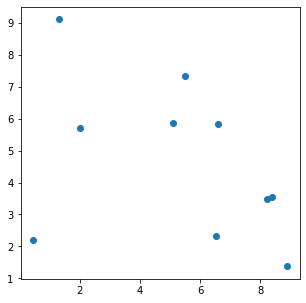

In [2]:
plt.figure(figsize=(5, 5))
plt.scatter(np.random.uniform(0, 10, 10), np.random.uniform(0, 10, 10))

<IPython.core.display.Javascript object>


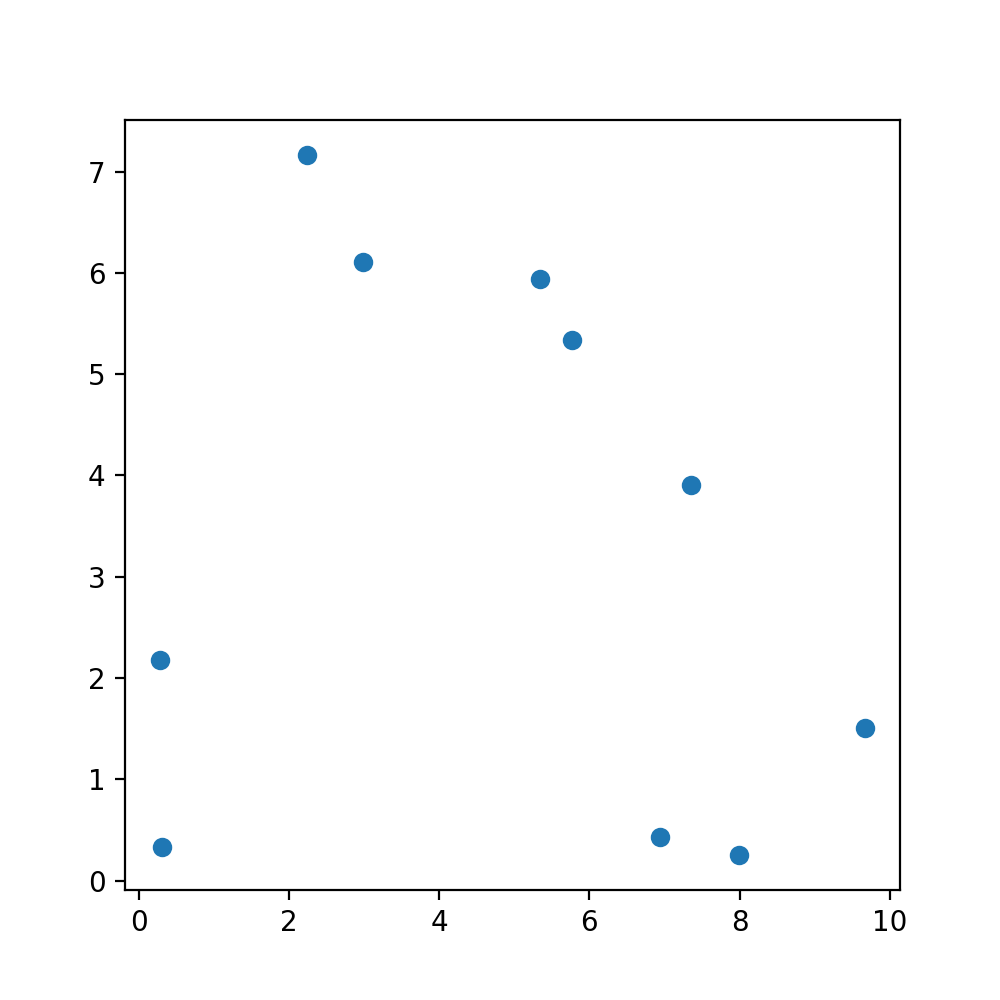

In [37]:
%matplotlib notebook
plt.figure(figsize=(5, 5))
plt.scatter(np.random.uniform(0, 10, 10), np.random.uniform(0, 10, 10));

With the plot above, you should be able to have a **first interaction**, like **zooming**, (by drawing a zooming arena using the square button below the figure). You can also see that the **current position** of the mouse is printed in the botton right corner.

Ok that's nice, but we want more interactive plots, in the sense where you can link clicks on the plot to predetrmined actions.

## Define a clicking interaction function
Let's understand a bit how the event class work. First we define the **action we want to do when we click on the plot** : it's the `do_smthg_when_I_click` function. It takes in argument a single argument, called `event`. event is a matplotlib class, which will store information about your mouse, like it position, the clicks, etc. Look inside the function. It has two interesting attributes : `xdata` and `ydata`. It's the **position of the mouse**, in graphic coordinates. Because matplotlib does not support interactive printing, I just *print* the clicked coordinates as the title of the figure. (`:.2f` is just here to limit the number of decimals)

In [9]:
def do_smth_when_I_click(event):
    click_x = event.xdata
    click_y = event.ydata
    plt.title(f"I'm clicking on : (x, y) = ({click_x:.2f}, {click_y:.2f})")

Now, I need to call this function, and to **link** the `event` to a specific plot. This is done by using the properties of $\texttt{Matplotlib}$ figures, ie `.canevas` and `.mpl_connect`. The latest allows to connect a user mouse behavior (here `button_press_event`) to the function we want (here `do_smthg_when_I_click`).
So now, our random scatter is plotted on the figure called `fig`, which is made interactive thanks to `fig.canvas.mpl_connect`.
## Try it : 
you should see the title of the figure evolve when clicking on the plot.

<IPython.core.display.Javascript object>


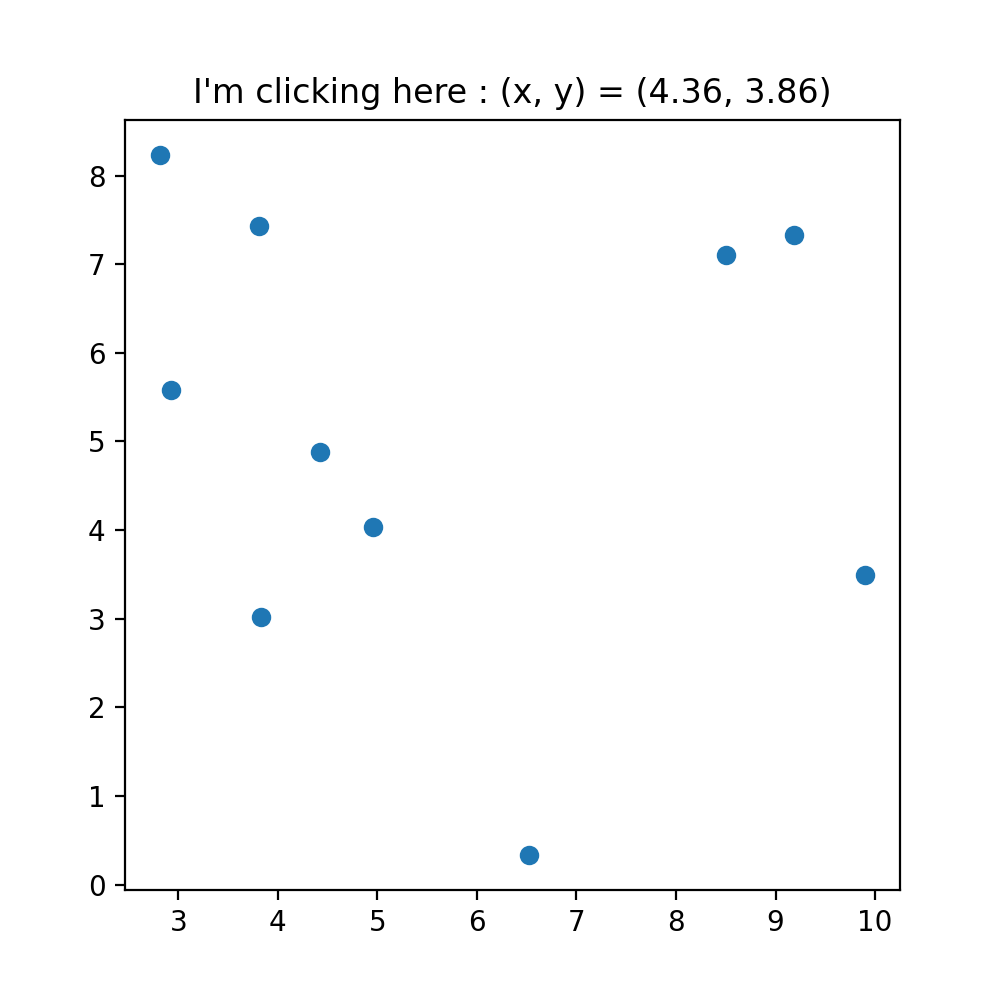

9

In [41]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(np.random.uniform(0, 10, 10), np.random.uniform(0, 10, 10))

fig.canvas.mpl_connect('button_press_event', do_smth_when_I_click)

### Good !
Now let's try to complexify a bit our function. What if we added points to our scatter where we click ? I just call the `scatter` method on the position where I'm clicking. In plt, the basic behavior of the figure is to continue plotting in the same plot.

In [42]:
def plot_new_points(event):
    click_x = event.xdata
    click_y = event.ydata
    plt.title(f"I'm clicking on : (x, y) = ({click_x:.2f}, {click_y:.2f})")
    plt.scatter(event.xdata, event.ydata)

<IPython.core.display.Javascript object>


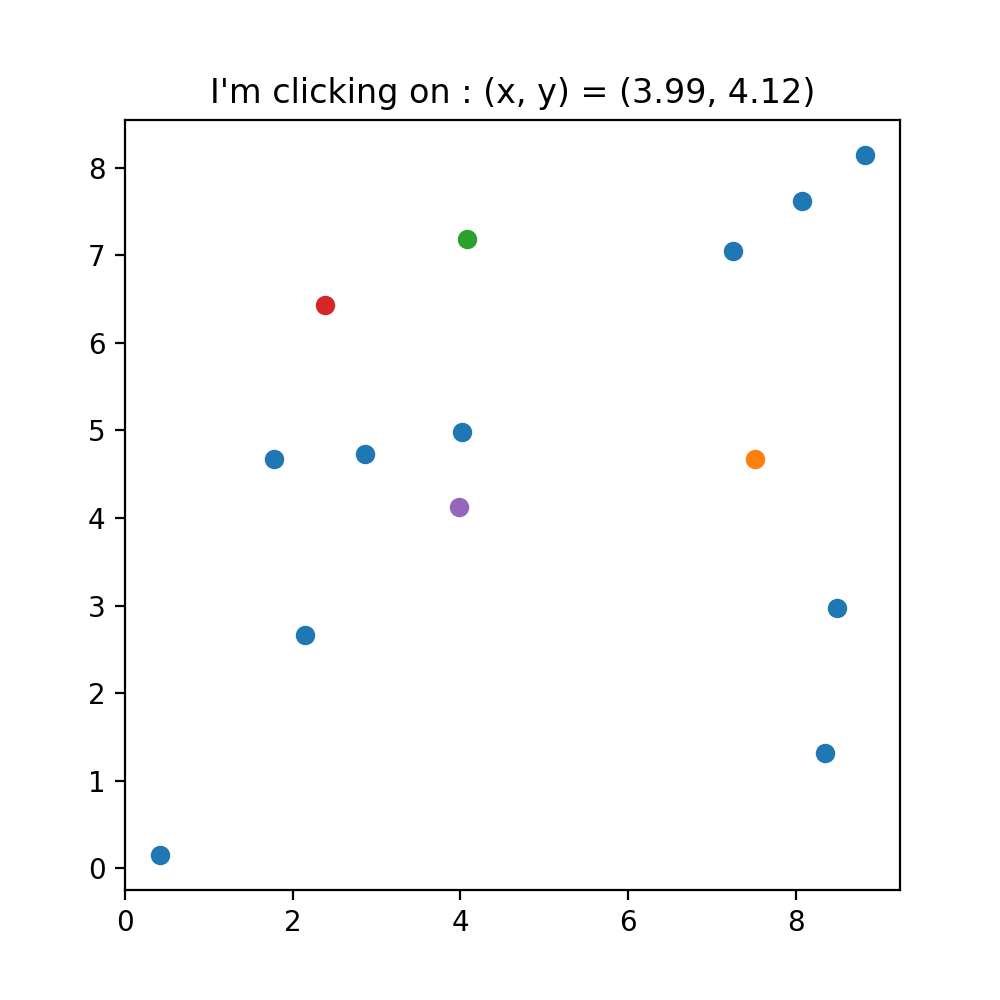

9

In [43]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(np.random.uniform(0, 10, 10), np.random.uniform(0, 10, 10))

fig.canvas.mpl_connect('button_press_event', plot_new_points)


### That's pretty ! 

Now, we'll continue our exploration with another interesting behaviour : `event` can also recognize the **difference between a righ click and a left click** (`ctrl click` should work if you don't have a mouse).
### Try It ! 
Right click and left click on the plot

<IPython.core.display.Javascript object>


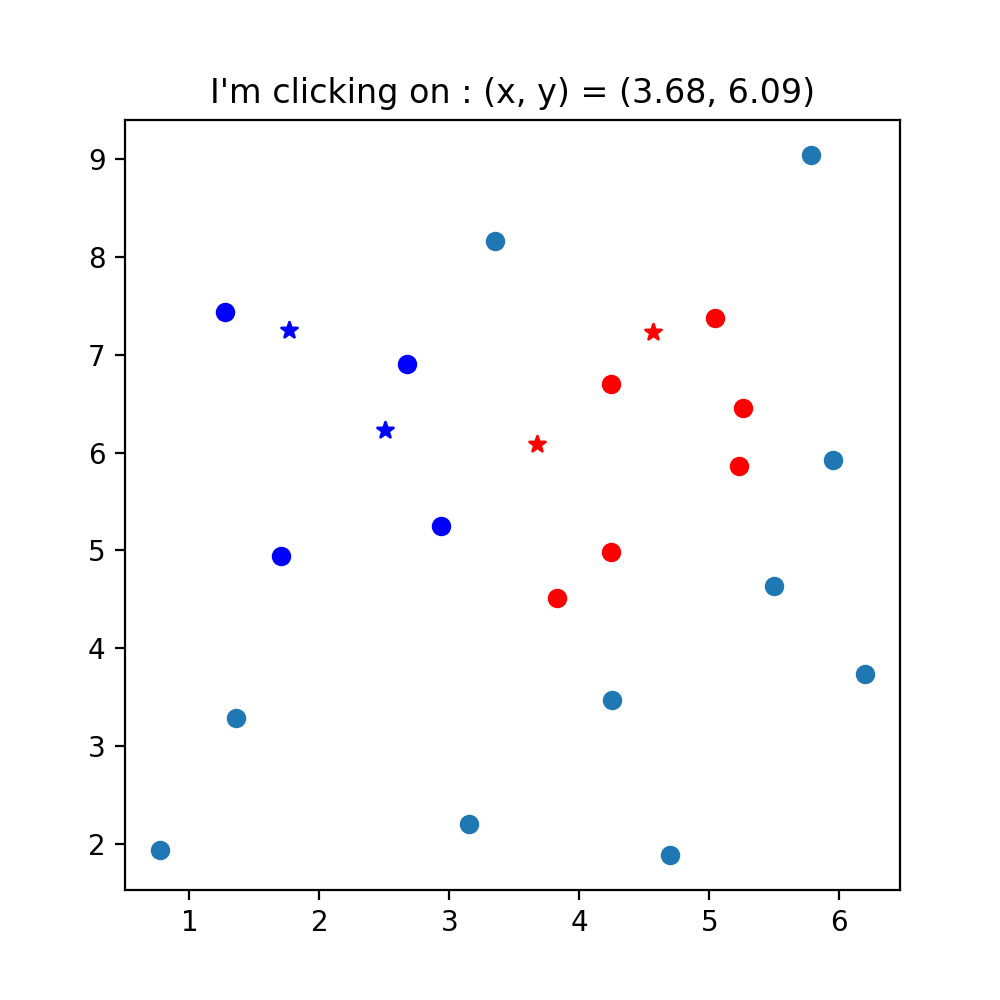

9

In [44]:
def plot_new_points(event):
    click_x = event.xdata
    click_y = event.ydata
    plt.title(f"I'm clicking on : (x, y) = ({click_x:.2f}, {click_y:.2f})")
    if (click_x > plt.xlim()[1]/2):
        color = 'red'
    else:
        color = 'blue'
    if event.button == 1:
        marker = 'o'
    if event.button == 3:
        marker = '*'
    plt.scatter(event.xdata, event.ydata, marker=marker, c=color)
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(np.random.uniform(0, 10, 10), np.random.uniform(0, 10, 10))

fig.canvas.mpl_connect('button_press_event', plot_new_points)


### Look what we've done : 
The type of click is stored in the `button` method of `event`. We have just changed the marker style depending if we are right clicking (`button = 1`) or left clicking(`button = 3`). We've also played a bit with the `xdata` method to change the color of the point regarding the position we clicked.

There is other type of click (double clicking, scrolling up or scrolling down), but they are unfortunatly unavailable on jupyter notebook. We'll go trough them on other tutorials using ipython or any python interpreter.

### Let's learn a last thing in this basic tutorial !
We've seen earlier that the `canvas`' `mpl_connect` method has an `'button_press_event'` argument. Well, it can also detects other behaviours, like the release of a click, the movement onto the figure or even detects when you leave the figure.
### Try it : click and hold, release, move your mouse, leave the figure !

<IPython.core.display.Javascript object>


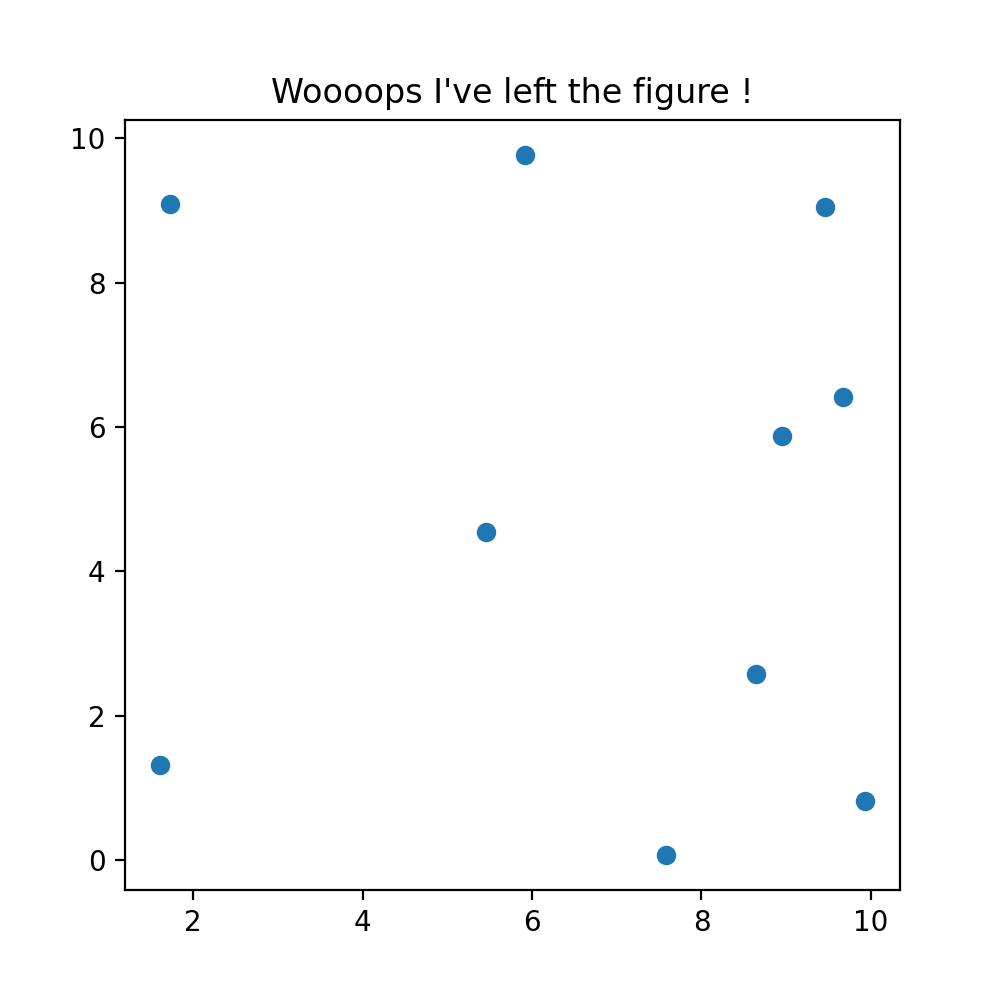

12

In [45]:
def press(event):
    plt.title("I'm clicking !")

def release(event):    
    plt.title("I'm releasing !")

def moving(event):    
    plt.title("Woooow I'm mooving !")

def leave_figure(event):    
    plt.title("Woooops I've left the figure !")
    
# def enter_axes(event):    
#     plt.title("Woooops You have left the plot !")

fig = plt.figure(figsize=(5, 5))
plt.scatter(np.random.uniform(0, 10, 10), np.random.uniform(0, 10, 10))

fig.canvas.mpl_connect('button_press_event', press)
fig.canvas.mpl_connect('button_release_event', release)
fig.canvas.mpl_connect('motion_notify_event', moving)
fig.canvas.mpl_connect('figure_leave_event', leave_figure)

### Look what we've done : 
We just need to link different fucntion to different arguments of the `mpl_connect` method : `'button_press_event'` linked to what we do when we click, `'motion_notify_event'` linked to what we do when we move, etc.
You can also use `'figure_enter_event'` or even specify actions when we leave the axes of the plot with `'axes_enter_event'` and `'axes_enter_event'`

### Here we are for our first tutorial on matplotlib interactive events !
You can see that with the type of button and the type of action, you can have a lot of combination and do whatever you want !
In the next tutorial, we'll define classes that links different behaviour and can store in memory the actions to interact even more interestingly with the plots. (remove points, draw things, plots figures inside the plots...)

### If you want to explore more the interactive plot yourself, be careful of one thing. If you have an error inside the action fucntion, it will not print in the Jupyter Cell, but in the terminal were you have open your jupyter notebook !